## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web



### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [36]:
# Defining Stocks
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'] 

#Creating dates
start_date ='2019-01-01'
end_date ='2019-07-1'

#Retriving data

stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [43]:
df = stock_data['Adj Close']
df.head().round(4)

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,98.3755,1539.13,38.5050,1045.85,135.68
2019-01-03,94.7565,1500.28,34.6696,1016.06,131.74
2019-01-04,99.1635,1575.39,36.1497,1070.71,137.95
2019-01-07,99.2900,1629.51,36.0692,1068.39,138.05
2019-01-08,100.0099,1656.58,36.7568,1076.28,142.53


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

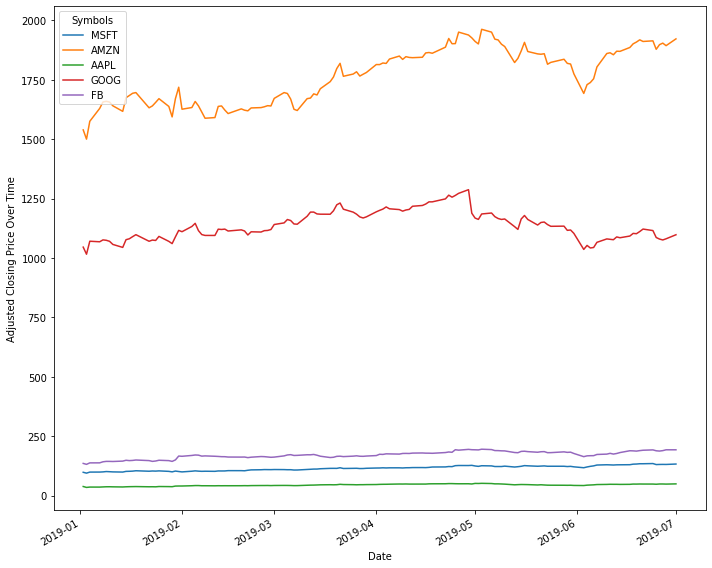

In [48]:
df.plot(figsize=(10,8))
plt.ylabel('Adjusted Closing Price Over Time')

plt.tight_layout()
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

In [51]:
returns = df.pct_change()
returns.dropna(inplace=True)
returns.head()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-03,-0.036788,-0.025242,-0.099607,-0.028484,-0.029039
2019-01-04,0.046509,0.050064,0.042689,0.053786,0.047138
2019-01-07,0.001275,0.034353,-0.002226,-0.002167,0.000725
2019-01-08,0.007251,0.016612,0.019063,0.007385,0.032452
2019-01-09,0.014300,0.001714,0.016982,-0.001505,0.011927


<AxesSubplot:xlabel='Date'>

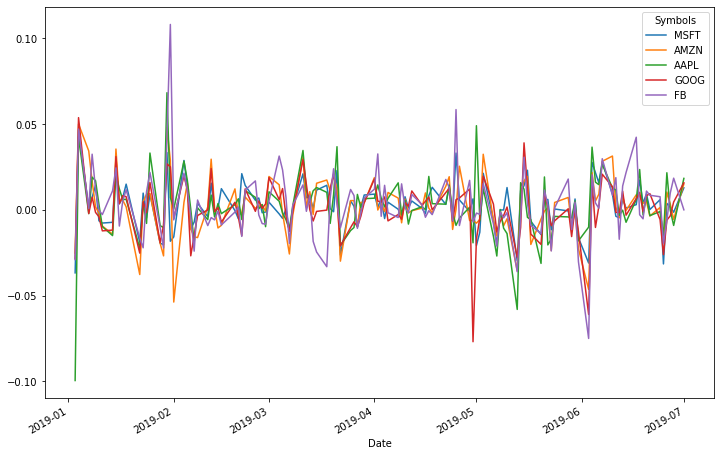

In [53]:
returns.plot(figsize=(12,8))

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

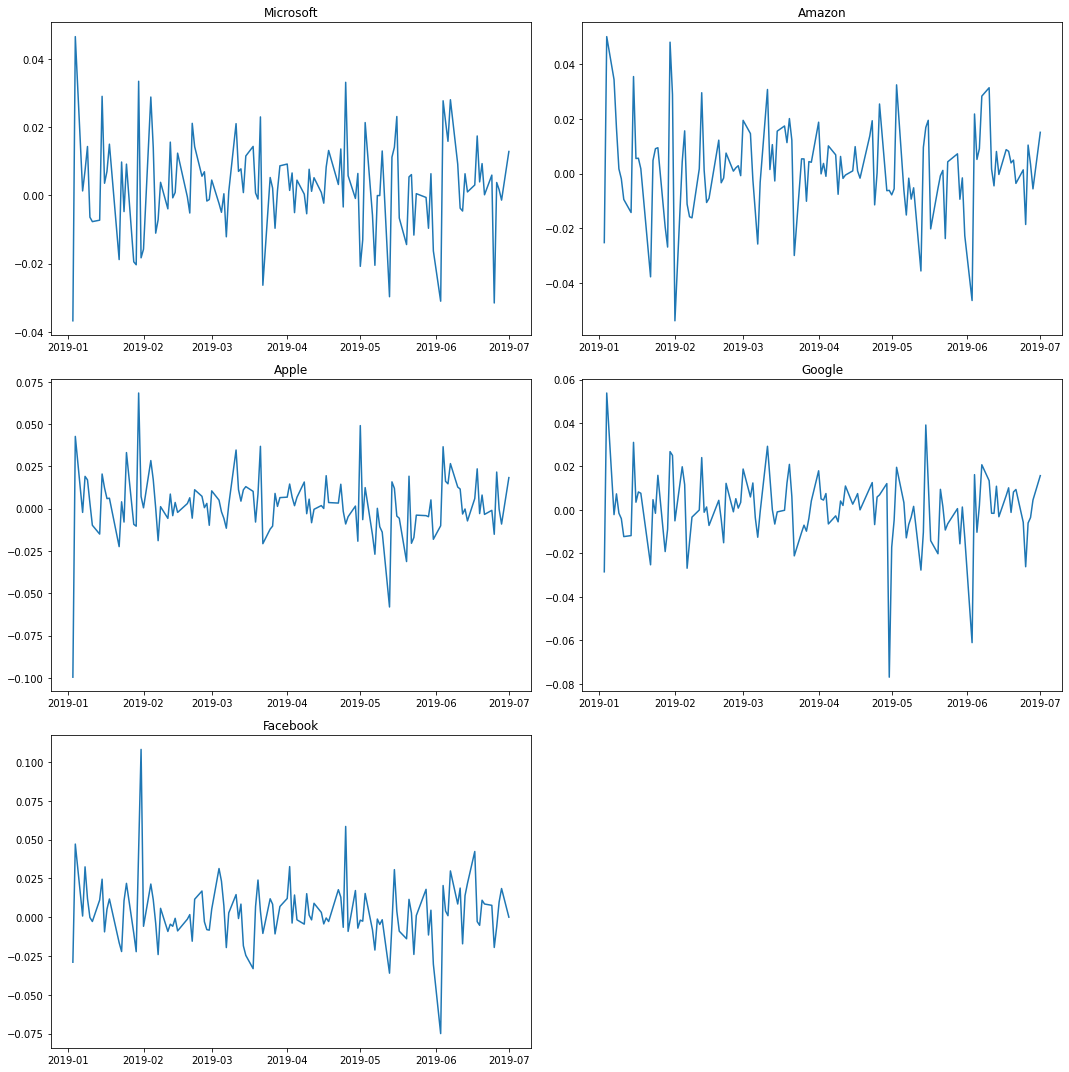

In [61]:
fig = plt.figure(figsize=(15,15))

# Alternative form for add_subplot(111) is add_subplot(1, 1, 1).
# For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

ax1.plot(returns['MSFT'])
ax1.set_title("Microsoft")
ax2.plot(returns['AMZN'])
ax2.set_title("Amazon")
ax3.plot(returns['AAPL'])
ax3.set_title('Apple')
ax4.plot(returns['GOOG'])
ax4.set_title('Google')
ax5.plot(returns['FB'])
ax5.set_title('Facebook')

plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [63]:
mean_rate = returns.mean()
mean_rate

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
dtype: float64

In [66]:
x = np.arange(len(mean_rate.keys()))
x

array([0, 1, 2, 3, 4])

In [71]:
y = mean_rate.unique()
y

array([0.00253237, 0.00193304, 0.002208  , 0.00052155, 0.00304583])

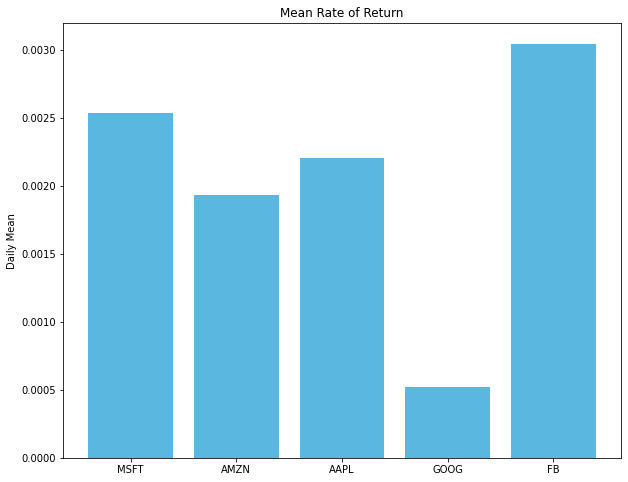

In [76]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x, y, capsize=5, color='#5ab8e0')  # hec color code
ax.set_xticks(x)
ax.set_xticklabels(mean_rate.keys())
ax.set_title('Mean Rate of Return')
ax.set_ylabel('Daily Mean')

#ax.legend()

plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [78]:
var = returns.var()
var

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
dtype: float64

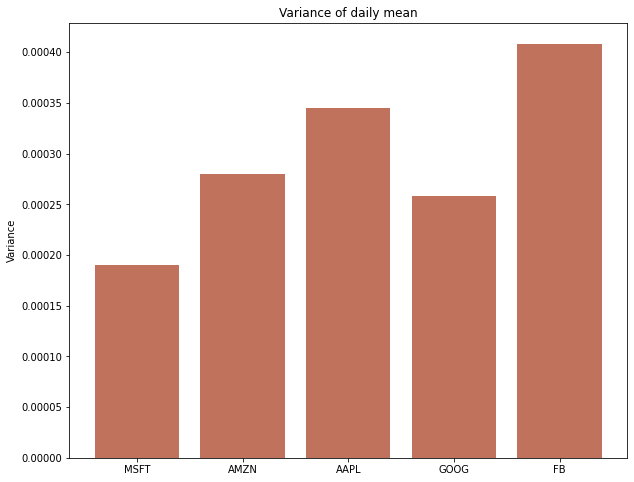

In [80]:
x1 = np.arange(len(var.keys()))
y1 = var.unique()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x1, y1, capsize=5, color='#C1725C')  # hec color code
ax.set_xticks(x1)
ax.set_xticklabels(var.keys())
ax.set_title('Variance of daily mean')
ax.set_ylabel('Variance')

#ax.legend()

plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.